<a href="https://colab.research.google.com/github/MatheusElis/Estatistica-Computacional/blob/main/Exercicios/hand%20ons%201/Hand_Ons_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matheus Elis da Silva - Mestrado - Computação Aplicada - INPE

In [29]:
%%capture
!pip install -U kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca 
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import plotly.io as pio
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.figure_factory as ff

pio.renderers.default = "png" 

# Import data

In [30]:
dfendo = pd.read_csv('https://raw.githubusercontent.com/MatheusElis/Estatistica-Computacional/main/Exercicios/hand%20ons%201/endo.csv', header = None)
dfexo = pd.read_csv('https://raw.githubusercontent.com/MatheusElis/Estatistica-Computacional/main/Exercicios/hand%20ons%201/exo.csv', header = None)

df = pd.concat([dfexo, dfendo], axis=1, join='inner')
df.columns = ["exo", "endo"]
df.insert(0, "endo_norm", (df["endo"] - np.mean(df["endo"]))/np.std(df["endo"]))
df.insert(0, "exo_norm", (df["exo"] - np.mean(df["exo"]))/np.std(df["exo"]))

df.head()

,exo_norm,endo_norm,exo,endo
0,0.583128,0.032145,2.78590,1.02060
1,0.395511,-0.763211,2.21130,0.53477
2,0.508584,-0.765634,2.55760,0.53329
3,-0.055765,-0.185934,0.82921,0.88739
4,0.673148,0.977249,3.06160,1.59790


# Exercise: 

## STEP 1: Plotting the ST (with Zero Averaging Option)

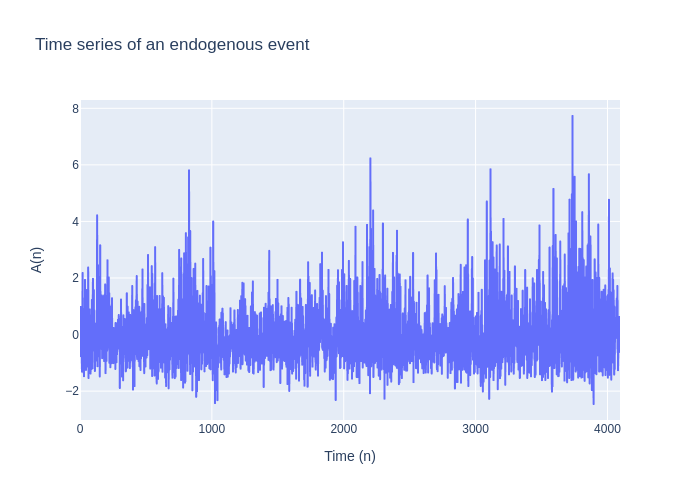

In [31]:
fig = px.line(df,  
              y="endo_norm",
              title = "Time series of an endogenous event",
              labels={'index':'Time (n)', 'endo_norm':'A(n)'})
fig.show()

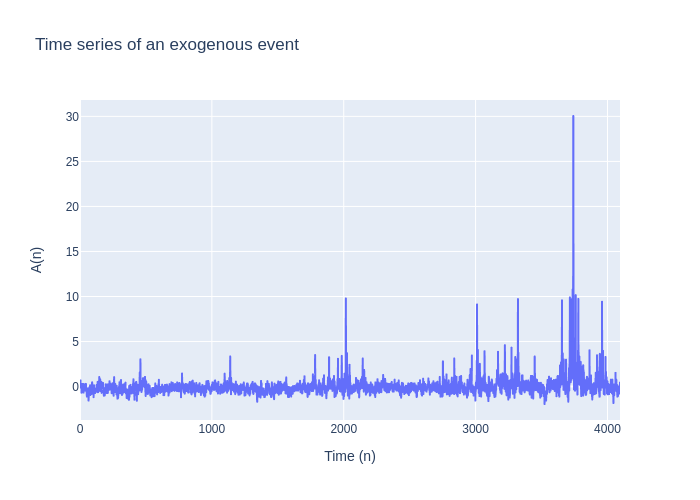

In [32]:
fig = px.line(df,  
              y="exo_norm",
              title = "Time series of an exogenous event",
              labels={'index':'Time (n)', 'exo_norm':'A(n)'})
fig.show()

## STEP 2: GET 3SIGMA AND REMOVE VALUES ABOVE $3 * \sigma$

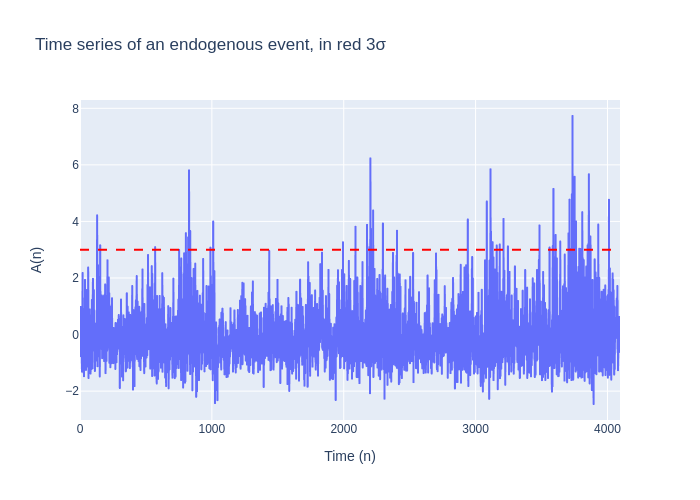

In [33]:
fig = px.line(df,  
              y="endo_norm",
              title = "Time series of an endogenous event, in red 3σ",
              labels={'index':'Time (n)', 'endo_norm':'A(n)'})
fig.add_hline(y=3*np.std(df["endo_norm"]), line_width=2, line_dash="dash", line_color="red", name = "3σ")

fig.show()

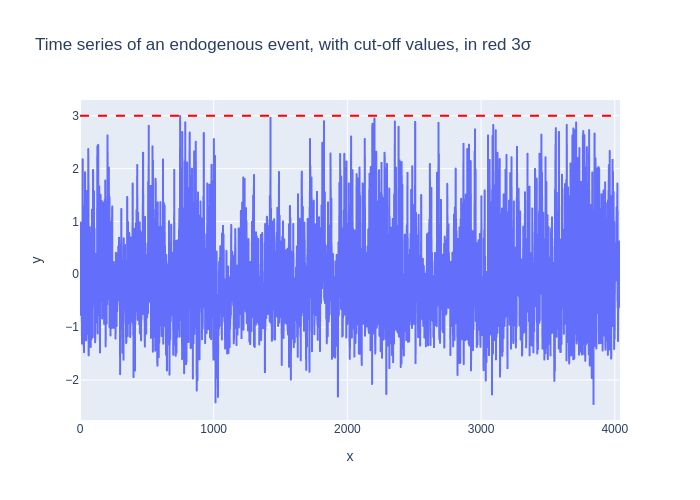

In [34]:
x = df[ df["endo_norm"] < 3*np.std(df["endo_norm"]) ]["endo_norm"]
df.insert(0,"endo_cut",x)

fig = px.line(x = range(len(x)),  
              y=x,
              title = "Time series of an endogenous event, with cut-off values, in red 3σ",
              labels={'index':'Time (n)', 'endo_norm':'A(n)'})
fig.add_hline(y=3*np.std(df["endo_norm"]), line_width=2, line_dash="dash", line_color="red", name = "3σ")
fig.show()

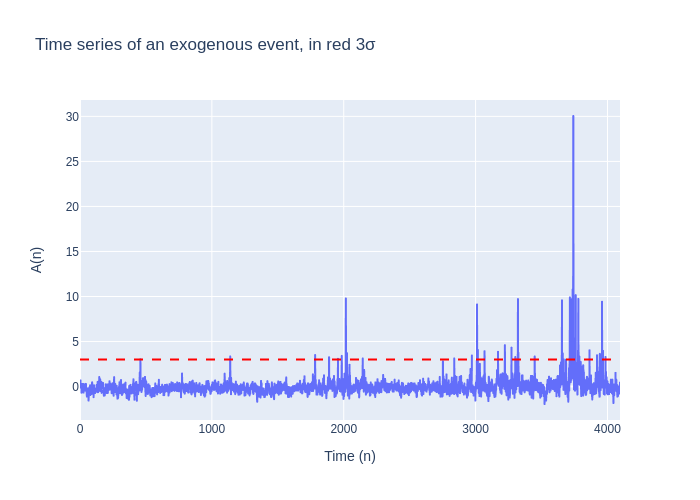

In [35]:
fig = px.line(df,  
              y="exo_norm",
              title = "Time series of an exogenous event, in red 3σ",
              labels={'index':'Time (n)', 'exo_norm':'A(n)'})
fig.add_hline(y=3*np.std(df["exo_norm"]), line_width=2, line_dash="dash", line_color="red", name = "3σ")

fig.show()

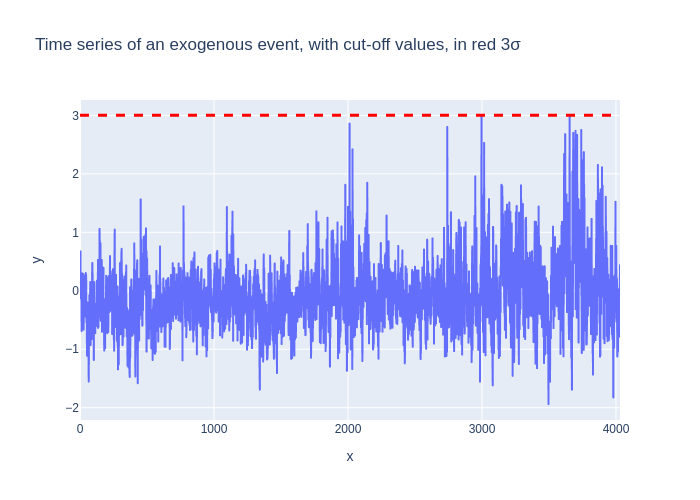

In [36]:
x = df[ df["exo_norm"] < 3*np.std(df["exo_norm"]) ]["exo_norm"]
df.insert(0,"exo_cut",x)
fig = px.line(x = range(len(x)),  
              y=x,
              title = "Time series of an exogenous event, with cut-off values, in red 3σ",
              labels={'index':'Time (n)', 'exo_norm':'A(n)'})
fig.add_hline(y=3*np.std(df["exo_norm"]), line_width=3, line_dash="dash", line_color="red", name = "3σ")

fig.show()

## STEP 4: CALCULATION OF STATISTICAL MOMENTS AND PLOTTING OF CULLEN-FREY PARAMETERS ($K$ and $S^2$)

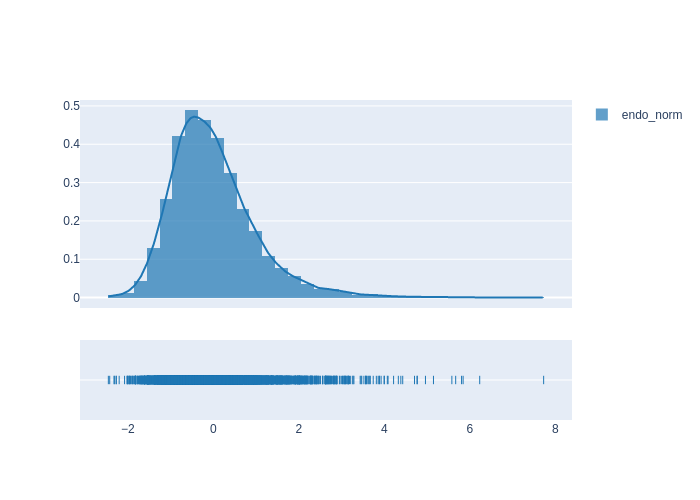

In [37]:
fig = ff.create_distplot([df["endo_norm"]],["endo_norm"],bin_size=.3)
fig.show()

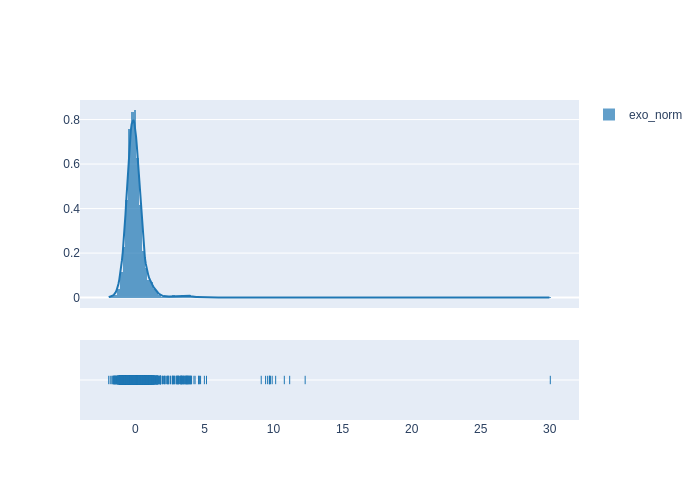

In [38]:
fig = ff.create_distplot([df["exo_norm"]],["exo_norm"],bin_size=.2)
fig.show()

## STEP 5: BUILD AND PLOOT THE PARAMETER SPACE (KURTOSIS X SKEWNESS SQUARE) WITH THE RESPECTIVE VALUES FOR ENDO.CSV (2 ST) AND EXO.CSV (2 ST) (USE DIFFERENT COLORS)

In [39]:
print(f"""
Means: {df.mean()}

Skewness: {df.skew()}

Fisher Kurtosis: {df.kurtosis()}
""")

df_moments = pd.DataFrame({"mean":df.mean(), "SkewnessSq":df.skew()**2, "Fisher Kurtosis":df.kurtosis()})
df_moments.head()


Means: exo_cut     -8.542343e-02
endo_cut    -5.450520e-02
exo_norm    -2.414654e-16
endo_norm    1.306924e-15
exo          9.999986e-01
endo         1.000964e+00
dtype: float64

Skewness: exo_cut       0.996859
endo_cut      0.664306
exo_norm     10.487356
endo_norm     1.329442
exo          10.487356
endo          1.329442
dtype: float64

Fisher Kurtosis: exo_cut        3.163324
endo_cut       0.467917
exo_norm     231.349982
endo_norm      3.858083
exo          231.349982
endo           3.858083
dtype: float64



,mean,SkewnessSq,Fisher Kurtosis
exo_cut,-8.542343e-02,0.993727,3.163324
endo_cut,-5.450520e-02,0.441303,0.467917
exo_norm,-2.414654e-16,109.984636,231.349982
endo_norm,1.306924e-15,1.767417,3.858083
exo,9.999986e-01,109.984636,231.349982


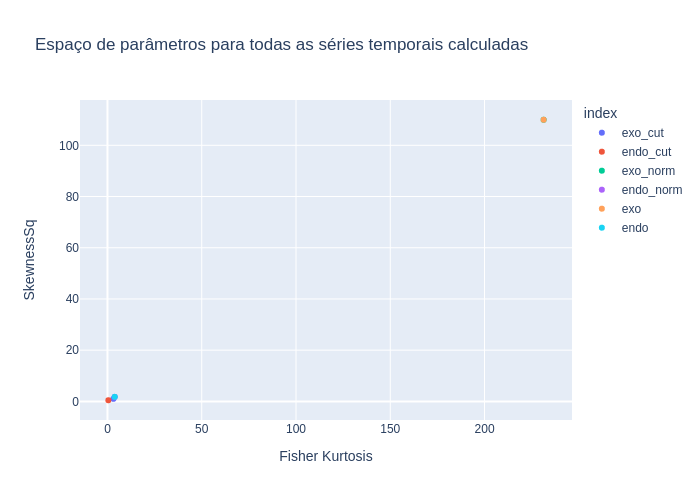

In [40]:
fig = px.scatter(df_moments, x = "Fisher Kurtosis",
                 y = "SkewnessSq",
                 color = df_moments.index,
                 title = "Espaço de parâmetros para todas as séries temporais calculadas",
                 )
fig.show()